In [132]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [222]:
img = cv2.imread('image/test2.png')

In [223]:
cv2.imshow('wallpaper', img)
cv2.waitKey(0)#キー入力まで待機
cv2.destroyAllWindows()

In [224]:
#resize
resize = cv2.resize(img,dsize=None,fx=0.5,fy=0.5)
#dsize(x,y)で直接指定

cv2.imshow('resize', resize)
cv2.waitKey(0)#キー入力まで待機
cv2.destroyAllWindows()

cv2.imwrite('image/wallpaper-resize.png',resize)

True

In [225]:
"""
# ウィンドウを作成
cv2.namedWindow(WINDOW_NAME)

BGRをグレースケールに変換	cv.COLOR_BGR2GRAY	cv.COLOR_GRAY2BGR
BGRにアルファチャンネルを追加	cv.COLOR_BGR2BGRA	cv.COLOR_BGRA2BGR
BGRをHSVに変換	cv.COLOR_BGR2HSV	cv.COLOR_HSV2BGR
BGRをLabに変換	cv.COLOR_BGR2Lab	cv.COLOR_Lab2BGR
BGRをLuvに変換	cv.COLOR_BGR2Luv	cv.COLOR_Luv2BGR
BGRをHLSに変換	cv.COLOR_BGR2HLS	cv.COLOR_HLS2BGR
BGRをYUVに変換	cv.COLOR_BGR2YUV	cv.COLOR_YUV2BGR
BGRをXYZに変換	cv.COLOR_BGR2XYZ	cv.COLOR_XYZ2BGR
BGRをYCrCbに変換	cv.COLOR_BGR2YCrCb	cv.COLOR_YCrCb2BGR
"""

'\n# ウィンドウを作成\ncv2.namedWindow(WINDOW_NAME)\n\nBGRをグレースケールに変換\tcv.COLOR_BGR2GRAY\tcv.COLOR_GRAY2BGR\nBGRにアルファチャンネルを追加\tcv.COLOR_BGR2BGRA\tcv.COLOR_BGRA2BGR\nBGRをHSVに変換\tcv.COLOR_BGR2HSV\tcv.COLOR_HSV2BGR\nBGRをLabに変換\tcv.COLOR_BGR2Lab\tcv.COLOR_Lab2BGR\nBGRをLuvに変換\tcv.COLOR_BGR2Luv\tcv.COLOR_Luv2BGR\nBGRをHLSに変換\tcv.COLOR_BGR2HLS\tcv.COLOR_HLS2BGR\nBGRをYUVに変換\tcv.COLOR_BGR2YUV\tcv.COLOR_YUV2BGR\nBGRをXYZに変換\tcv.COLOR_BGR2XYZ\tcv.COLOR_XYZ2BGR\nBGRをYCrCbに変換\tcv.COLOR_BGR2YCrCb\tcv.COLOR_YCrCb2BGR\n'

In [226]:
#grayscale
gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)#グレースケール化

cv2.imshow('gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('image/wallpaper-gray.png',gray)

True

In [234]:
#2GRAY
ret ,binary1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)#二極化
ret ,binary2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

cv2.imshow('binary1', binary1)
cv2.imshow('binary2', binary2)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('image/wallpaper-binary1.png',binary1)
cv2.imwrite('image/wallpaper-binary2.png',binary2)

True

In [216]:
#色調変換
cvt_color = cv2.cvtColor(resize, cv2.COLOR_BGR2LAB)

cv2.imshow('cvt', cvt_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('image/wallpaper-cvtColor.png',cvt_color)

True

In [217]:
#RGB
cvt_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)

cv2.imshow('cvtRGB', cvt_RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('image/wallpaper-cvtRGB.png',cvt_RGB)

True

In [220]:
#色分離

# ゼロ埋めの画像配列

img = resize

if len(img.shape) == 3:
    height, width, channels = img.shape[:3]
else:
    height, width = img.shape[:2]
    channels = 1
zeros = np.zeros((height, width), img.dtype)



img_blue_c1, img_green_c1, img_red_c1 = cv2.split(img)

img_blue_c3 = cv2.merge((img_blue_c1, zeros, zeros))
img_green_c3 = cv2.merge((zeros, img_green_c1, zeros))
img_red_c3 = cv2.merge((zeros, zeros, img_red_c1))

cv2.imshow('R', img_red_c3)
cv2.imshow('G', img_green_c3)
cv2.imshow('B', img_blue_c3)
cv2.waitKey(0)
cv2.destroyAllWindows()


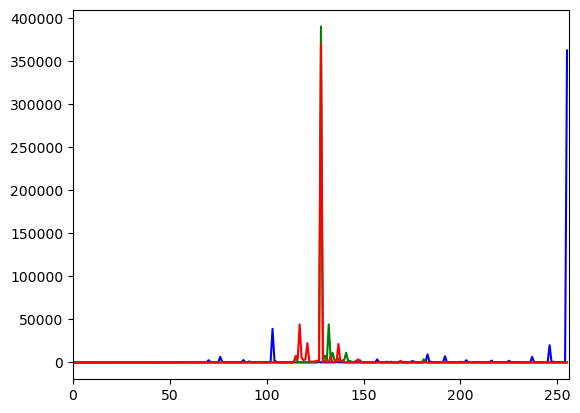

In [219]:
#ヒストグラム

color = ("b","g","r")

for i,col in enumerate(color):
    hist = cv2.calcHist(images=[cvt_color], channels=[i],
                       mask=None, histSize=[256], ranges=[0,256])
    #cv2.calcHist(画像オブジェクト, チャンネル, マスク,
    #ヒストグラムのサイズ,ヒストグラムのレンジ)
    plt.plot(hist, color= col)
    plt.xlim([0,256])
    
plt.show()